In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 1.Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.
### 2.Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #chuyển InvoiceDate thành datetime object
d1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] #lấy các cột dữ liệu cần thiết
d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
d1 = d1.set_index(['InvoiceDate']) #chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng

d4 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') # xóa bỏ các dòng trùng lặp của cùng một đơn hàng
d4 = d4['2011']
d4 = d4.reset_index()
d5 = d4.groupby(by=d4['InvoiceDate'].dt.month).count() #đếm tổng số đơn hàng trong tháng

D:\a\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


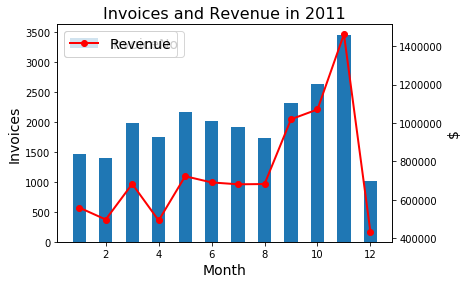

In [6]:
x = d5.index.get_level_values(0)
plt.bar(x, d5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, d3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('Invoices', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('Invoices and Revenue in 2011', fontsize = 16)
plt.show()

#### ==> Tháng 4 có tổng số đơn hàng nhiều hơn tháng 2. Tuy nhiên tổng doanh thu thì chỉ tương đương.
#### ==> Tháng 9, 10, 11 tổng số đơn hàng nhiều và tổng doanh thu cũng tăng nhanh chóng.
